In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mp
import matplotlib.colors as mcolors
import numpy as np
from colour import Color

In [2]:
df = pd.read_csv('../../final_product/data/latest_data.csv',index_col=0)
df.head()

,backers_count,category,country_displayable_name,created_at,deadline,goal_convert,id,launched_at,pledged,staff_pick,...,sub_category,blurb_length,launch_to_deadline,creation_to_launch,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time
0,2076,food,the United States,2014-11-28 18:42:27,2015-04-10 02:00:00,75000.000000,2147476221,2015-03-02 15:14:38,304142.0,False,...,drinks,20.0,38,93,Monday,Friday,March,April,2pm-4pm,2am-4am
1,0,photography,Canada,2014-07-08 19:50:38,2014-07-24 15:23:00,1148.763315,2147466649,2014-07-11 18:56:05,0.0,False,...,fine art,22.0,12,2,Friday,Thursday,July,July,6pm-8pm,2pm-4pm
2,53,art,the United States,2011-04-25 17:48:20,2011-08-04 04:30:00,18000.000000,2147460119,2011-06-24 19:29:15,18758.0,True,...,conceptual art,21.0,40,60,Friday,Thursday,June,August,6pm-8pm,4am-6am
3,181,games,the United States,2019-09-22 17:11:47,2020-03-19 14:32:55,500.000000,2147450956,2020-02-18 15:33:12,5026.0,True,...,tabletop games,23.0,29,148,Tuesday,Thursday,February,March,2pm-4pm,2pm-4pm
4,52,food,Canada,2014-12-30 17:32:49,2015-02-11 17:26:23,179139.466350,2147437278,2015-01-02 17:26:23,3091.0,False,...,community gardens,18.0,40,2,Friday,Wednesday,January,February,4pm-6pm,4pm-6pm


In [3]:
df.describe()

,backers_count,goal_convert,id,pledged,usd_pledged,blurb_length,launch_to_deadline,creation_to_launch
count,175646.000000,1.756460e+05,1.756460e+05,1.756460e+05,1.756460e+05,175646.000000,175646.000000,175646.000000
mean,157.291638,3.757963e+04,1.074038e+09,2.193918e+04,1.388326e+04,18.328866,32.453258,47.574662
std,987.189960,1.020309e+06,6.191279e+08,5.178368e+05,1.085125e+05,5.404658,11.993971,134.576302
min,0.000000,1.000000e-02,1.852000e+04,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000
25%,4.000000,1.382596e+03,5.373686e+08,1.250000e+02,1.212438e+02,15.000000,29.000000,3.000000
50%,28.000000,4.831460e+03,1.075523e+09,1.631000e+03,1.601000e+03,19.000000,30.000000,11.000000
75%,93.000000,1.200000e+04,1.609367e+09,7.135000e+03,6.705000e+03,22.000000,34.000000,36.000000
max,105857.000000,1.291356e+08,2.147476e+09,1.469102e+08,1.296961e+07,43.000000,97.000000,3303.000000


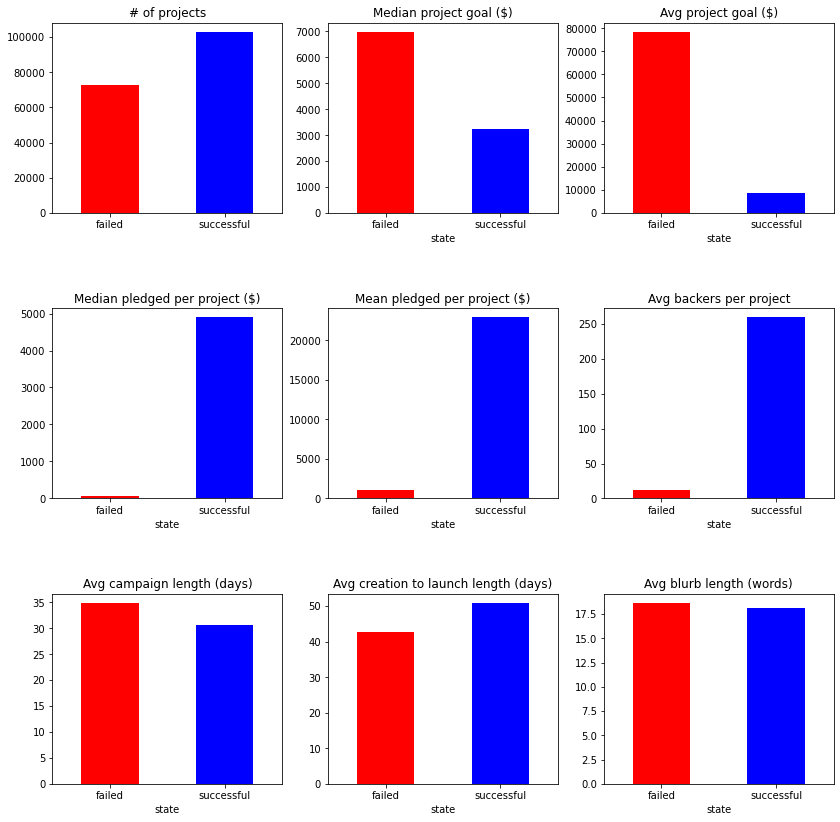

In [4]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(14,14))

df['state'].value_counts(ascending=True).plot(kind='bar', ax=ax1, color=['red', 'blue'], rot=0)
ax1.set_title('# of projects')

df.groupby('state').goal_convert.median().plot(kind='bar', ax=ax2, color=['red', 'blue'], rot=0)
ax2.set_title('Median project goal ($)')

df.groupby('state').goal_convert.mean().plot(kind='bar', ax=ax3, color=['red', 'blue'], rot=0)
ax3.set_title('Avg project goal ($)')

df.groupby('state').usd_pledged.median().plot(kind='bar', ax=ax4, color=['red', 'blue'], rot=0)
ax4.set_title('Median pledged per project ($)')

df.groupby('state').usd_pledged.mean().plot(kind='bar', ax=ax5, color=['red', 'blue'], rot=0)
ax5.set_title('Mean pledged per project ($)')

df.groupby('state').backers_count.mean().plot(kind='bar', ax=ax6, color=['red', 'blue'], rot=0)
ax6.set_title('Avg backers per project')


df.groupby('state').launch_to_deadline.mean().plot(kind='bar', ax=ax7, color=['red', 'blue'], rot=0)
ax7.set_title('Avg campaign length (days)')


df.groupby('state').creation_to_launch.mean().plot(kind='bar', ax=ax8, color=['red', 'blue'], rot=0)
ax8.set_title('Avg creation to launch length (days)')


df.groupby('state').blurb_length.mean().plot(kind='bar', ax=ax9, color=['red', 'blue'], rot=0)
ax9.set_title('Avg blurb length (words)')

fig.subplots_adjust(hspace=0.5)
plt.savefig('visuals/failed_success.png')
plt.show()


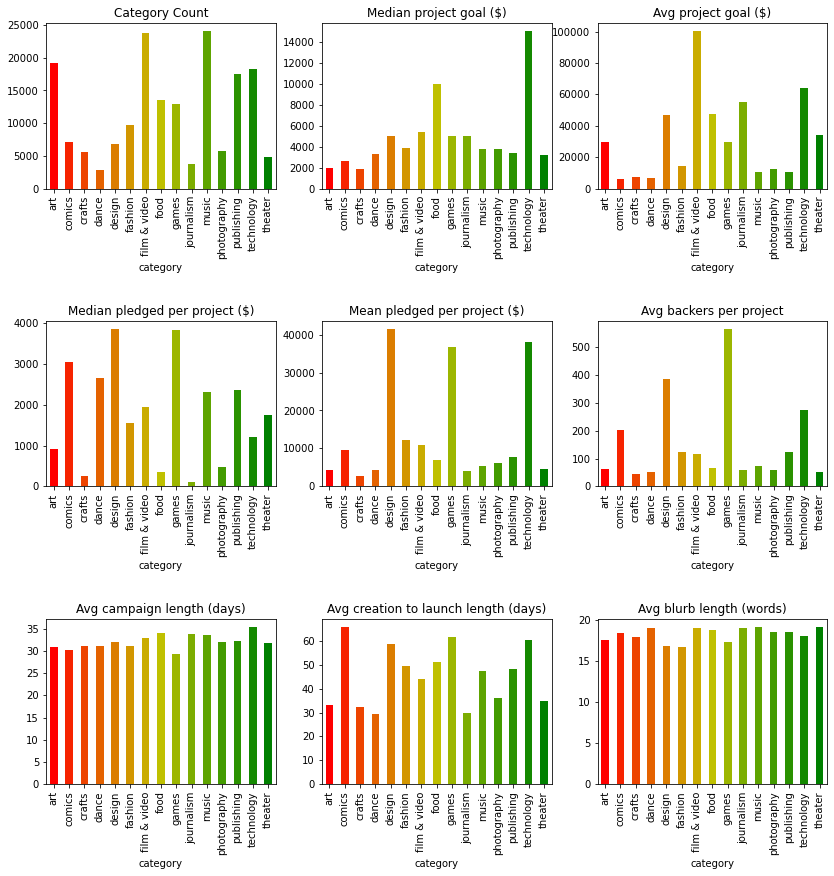

In [5]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(14,14))
red = Color("red")
color = list(red.range_to(Color("green"),15))
color = [color.rgb for color in color]

df.groupby('category').category.count().plot(kind='bar', ax=ax1, color=color, rot=90)
ax1.set_title('Category Count')

df.groupby('category').goal_convert.median().plot(kind='bar', ax=ax2, color=color, rot=90)
ax2.set_title('Median project goal ($)')

df.groupby('category').goal_convert.mean().plot(kind='bar', ax=ax3, color=color, rot=90)
ax3.set_title('Avg project goal ($)')

df.groupby('category').usd_pledged.median().plot(kind='bar', ax=ax4, color=color, rot=90)
ax4.set_title('Median pledged per project ($)')

df.groupby('category').usd_pledged.mean().plot(kind='bar', ax=ax5, color=color, rot=90)
ax5.set_title('Mean pledged per project ($)')

df.groupby('category').backers_count.mean().plot(kind='bar', ax=ax6, color=color, rot=90)
ax6.set_title('Avg backers per project')


df.groupby('category').launch_to_deadline.mean().plot(kind='bar', ax=ax7, color=color, rot=90)
ax7.set_title('Avg campaign length (days)')


df.groupby('category').creation_to_launch.mean().plot(kind='bar', ax=ax8, color=color, rot=90)
ax8.set_title('Avg creation to launch length (days)')


df.groupby('category').blurb_length.mean().plot(kind='bar', ax=ax9, color=color, rot=90)
ax9.set_title('Avg blurb length (words)')

fig.subplots_adjust(hspace=0.8)
plt.savefig('visuals/category.png')
plt.show()

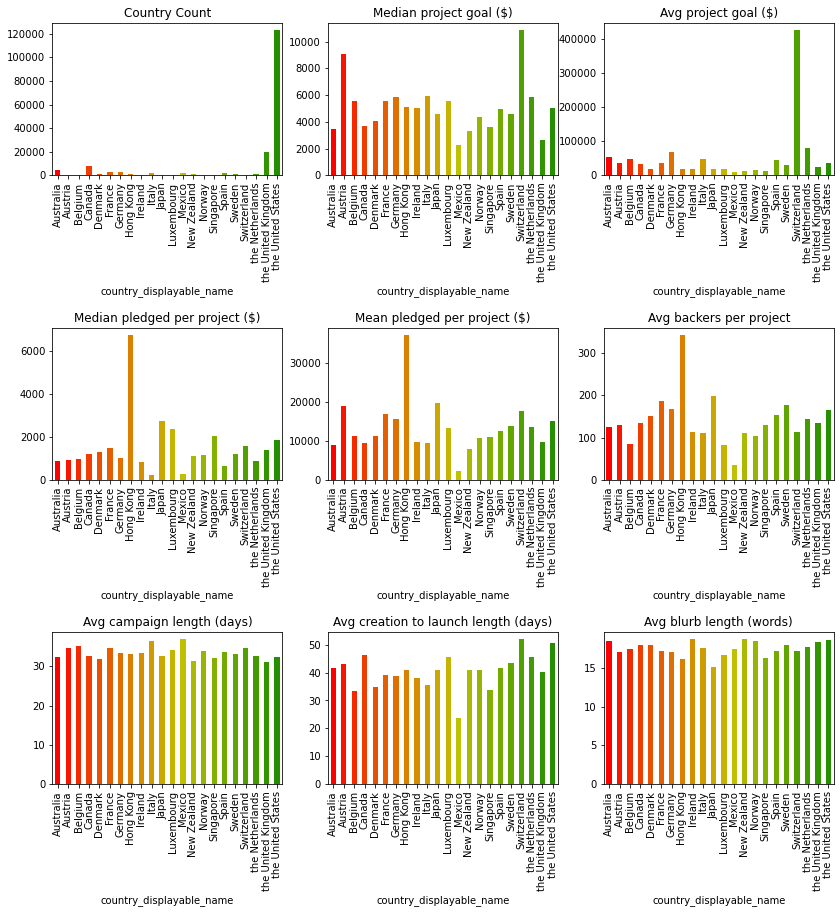

In [6]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(14,14))
red = Color("red")
color = list(red.range_to(Color("green"),25))
color = [color.rgb for color in color]

df.groupby('country_displayable_name').category.count().plot(kind='bar', ax=ax1, color=color, rot=90)
ax1.set_title('Country Count')

df.groupby('country_displayable_name').goal_convert.median().plot(kind='bar', ax=ax2, color=color, rot=90)
ax2.set_title('Median project goal ($)')

df.groupby('country_displayable_name').goal_convert.mean().plot(kind='bar', ax=ax3, color=color, rot=90)
ax3.set_title('Avg project goal ($)')

df.groupby('country_displayable_name').usd_pledged.median().plot(kind='bar', ax=ax4, color=color, rot=90)
ax4.set_title('Median pledged per project ($)')

df.groupby('country_displayable_name').usd_pledged.mean().plot(kind='bar', ax=ax5, color=color, rot=90)
ax5.set_title('Mean pledged per project ($)')

df.groupby('country_displayable_name').backers_count.mean().plot(kind='bar', ax=ax6, color=color, rot=90)
ax6.set_title('Avg backers per project')


df.groupby('country_displayable_name').launch_to_deadline.mean().plot(kind='bar', ax=ax7, color=color, rot=90)
ax7.set_title('Avg campaign length (days)')


df.groupby('country_displayable_name').creation_to_launch.mean().plot(kind='bar', ax=ax8, color=color, rot=90)
ax8.set_title('Avg creation to launch length (days)')


df.groupby('country_displayable_name').blurb_length.mean().plot(kind='bar', ax=ax9, color=color, rot=90)
ax9.set_title('Avg blurb length (words)')

fig.subplots_adjust(hspace=1.0)
plt.savefig('visuals/country.png')
plt.show()

In [53]:
month_count = df.groupby('launch_month').launch_month.count()
month_count_sorted = month_count[['January',
                      'February',
                      'March',
                      'April',
                      'May',
                      'June',
                      'July',
                      'August',
                      'September',
                      'October',
                      'November',
                      'December']]
median_project = df.groupby('launch_month').goal_convert.median()
median_project_sorted = median_project[['January',
                      'February',
                      'March',
                      'April',
                      'May',
                      'June',
                      'July',
                      'August',
                      'September',
                      'October',
                      'November',
                      'December']]
avg_project = df.groupby('launch_month').goal_convert.mean()
avg_project_sorted = avg_project[['January',
                      'February',
                      'March',
                      'April',
                      'May',
                      'June',
                      'July',
                      'August',
                      'September',
                      'October',
                      'November',
                      'December']]
median_pledged = df.groupby('launch_month').usd_pledged.median()
median_pledged_sorted = median_pledged[['January',
                      'February',
                      'March',
                      'April',
                      'May',
                      'June',
                      'July',
                      'August',
                      'September',
                      'October',
                      'November',
                      'December']]
mean_pledged = df.groupby('launch_month').usd_pledged.mean()
mean_pledged_sorted = mean_pledged[['January',
                      'February',
                      'March',
                      'April',
                      'May',
                      'June',
                      'July',
                      'August',
                      'September',
                      'October',
                      'November',
                      'December']]
avg_backers = df.groupby('launch_month').backers_count.mean()
avg_backers_sorted = avg_backers[['January',
                      'February',
                      'March',
                      'April',
                      'May',
                      'June',
                      'July',
                      'August',
                      'September',
                      'October',
                      'November',
                      'December']]
avg_campaign = df.groupby('launch_month').launch_to_deadline.mean()
avg_campaign_sorted = avg_campaign[['January',
                      'February',
                      'March',
                      'April',
                      'May',
                      'June',
                      'July',
                      'August',
                      'September',
                      'October',
                      'November',
                      'December']]
avg_creation = df.groupby('launch_month').creation_to_launch.mean()
avg_creation_sorted = avg_creation[['January',
                      'February',
                      'March',
                      'April',
                      'May',
                      'June',
                      'July',
                      'August',
                      'September',
                      'October',
                      'November',
                      'December']]
avg_blurb = df.groupby('launch_month').blurb_length.mean()
avg_blurb_sorted = avg_blurb[['January',
                      'February',
                      'March',
                      'April',
                      'May',
                      'June',
                      'July',
                      'August',
                      'September',
                      'October',
                      'November',
                      'December']]

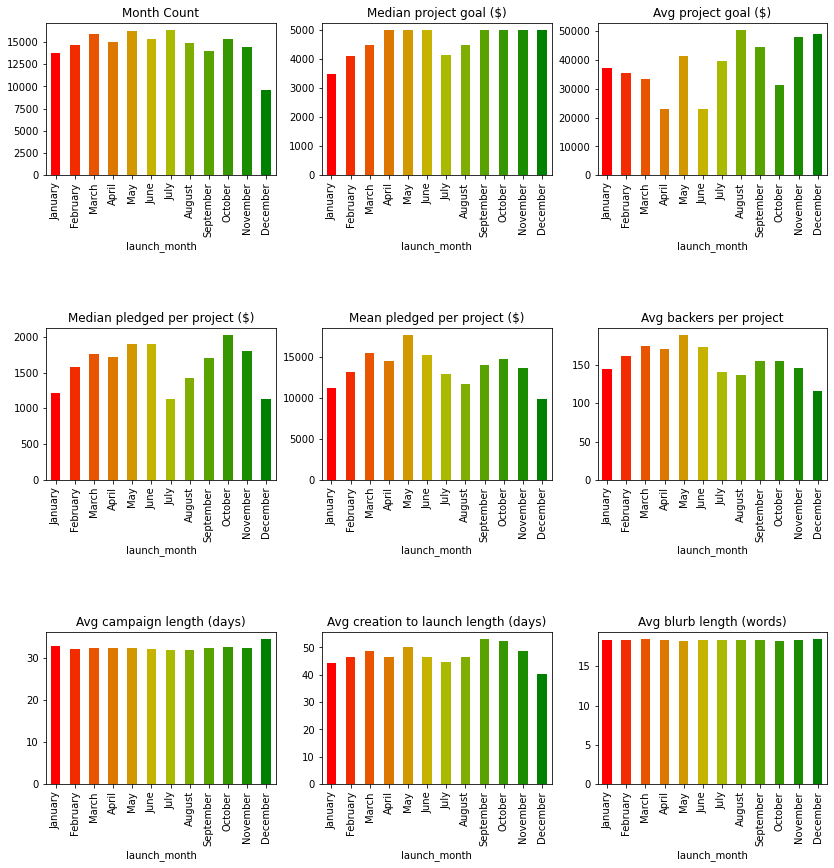

In [55]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(14,14))
red = Color("red")
color = list(red.range_to(Color("green"),12))
color = [color.rgb for color in color]

month_count_sorted.plot(kind='bar', ax=ax1, color=color, rot=90)
ax1.set_title('Month Count')

median_project_sorted.plot(kind='bar', ax=ax2, color=color, rot=90)
ax2.set_title('Median project goal ($)')

avg_project_sorted.plot(kind='bar', ax=ax3, color=color, rot=90)
ax3.set_title('Avg project goal ($)')

median_pledged_sorted.plot(kind='bar', ax=ax4, color=color, rot=90)
ax4.set_title('Median pledged per project ($)')

mean_pledged_sorted.plot(kind='bar', ax=ax5, color=color, rot=90)
ax5.set_title('Mean pledged per project ($)')

avg_backers_sorted.plot(kind='bar', ax=ax6, color=color, rot=90)
ax6.set_title('Avg backers per project')


avg_campaign_sorted.plot(kind='bar', ax=ax7, color=color, rot=90)
ax7.set_title('Avg campaign length (days)')


avg_creation_sorted.plot(kind='bar', ax=ax8, color=color, rot=90)
ax8.set_title('Avg creation to launch length (days)')


avg_blurb_sorted.plot(kind='bar', ax=ax9, color=color, rot=90)
ax9.set_title('Avg blurb length (words)')

fig.subplots_adjust(hspace=1.0)
plt.savefig('visuals/launch_month.png')
plt.show()

In [49]:
time_count = df.groupby('launch_time').launch_month.count()
time_count_sorted = time_count[['12am-2am',
                      '2am-4am',
                      '4am-6am',
                      '6am-8am',
                      '8am-10am',
                      '10am-12pm',
                      '12pm-2pm',
                      '2pm-4pm',
                      '4pm-6pm',
                      '6pm-8pm',
                      '8pm-10pm',
                      '10pm-12am']]
median_goal = df.groupby('launch_time').goal_convert.median()
median_goal_sorted = median_goal[['12am-2am',
                      '2am-4am',
                      '4am-6am',
                      '6am-8am',
                      '8am-10am',
                      '10am-12pm',
                      '12pm-2pm',
                      '2pm-4pm',
                      '4pm-6pm',
                      '6pm-8pm',
                      '8pm-10pm',
                      '10pm-12am']]
avg_project = df.groupby('launch_time').goal_convert.mean()
avg_project_sorted = avg_project[['12am-2am',
                      '2am-4am',
                      '4am-6am',
                      '6am-8am',
                      '8am-10am',
                      '10am-12pm',
                      '12pm-2pm',
                      '2pm-4pm',
                      '4pm-6pm',
                      '6pm-8pm',
                      '8pm-10pm',
                      '10pm-12am']]
median_pledged = df.groupby('launch_time').usd_pledged.median()
median_pledged_sorted = median_pledged[['12am-2am',
                      '2am-4am',
                      '4am-6am',
                      '6am-8am',
                      '8am-10am',
                      '10am-12pm',
                      '12pm-2pm',
                      '2pm-4pm',
                      '4pm-6pm',
                      '6pm-8pm',
                      '8pm-10pm',
                      '10pm-12am']]
mean_pledged = df.groupby('launch_time').usd_pledged.mean()
mean_pledged_sorted = mean_pledged[['12am-2am',
                      '2am-4am',
                      '4am-6am',
                      '6am-8am',
                      '8am-10am',
                      '10am-12pm',
                      '12pm-2pm',
                      '2pm-4pm',
                      '4pm-6pm',
                      '6pm-8pm',
                      '8pm-10pm',
                      '10pm-12am']]
avg_backers = df.groupby('launch_time').backers_count.mean()
avg_backers_sorted = avg_backers[['12am-2am',
                      '2am-4am',
                      '4am-6am',
                      '6am-8am',
                      '8am-10am',
                      '10am-12pm',
                      '12pm-2pm',
                      '2pm-4pm',
                      '4pm-6pm',
                      '6pm-8pm',
                      '8pm-10pm',
                      '10pm-12am']]
avg_campaign = df.groupby('launch_time').launch_to_deadline.mean()
avg_campaign_sorted = avg_campaign[['12am-2am',
                      '2am-4am',
                      '4am-6am',
                      '6am-8am',
                      '8am-10am',
                      '10am-12pm',
                      '12pm-2pm',
                      '2pm-4pm',
                      '4pm-6pm',
                      '6pm-8pm',
                      '8pm-10pm',
                      '10pm-12am']]
avg_creation_to_launch = df.groupby('launch_time').creation_to_launch.mean()
avg_creation_to_launch_sorted = avg_creation_to_launch[['12am-2am',
                      '2am-4am',
                      '4am-6am',
                      '6am-8am',
                      '8am-10am',
                      '10am-12pm',
                      '12pm-2pm',
                      '2pm-4pm',
                      '4pm-6pm',
                      '6pm-8pm',
                      '8pm-10pm',
                      '10pm-12am']]
avg_blurb = df.groupby('launch_time').blurb_length.mean()
avg_blurb_sorted = avg_blurb[['12am-2am',
                      '2am-4am',
                      '4am-6am',
                      '6am-8am',
                      '8am-10am',
                      '10am-12pm',
                      '12pm-2pm',
                      '2pm-4pm',
                      '4pm-6pm',
                      '6pm-8pm',
                      '8pm-10pm',
                      '10pm-12am']]

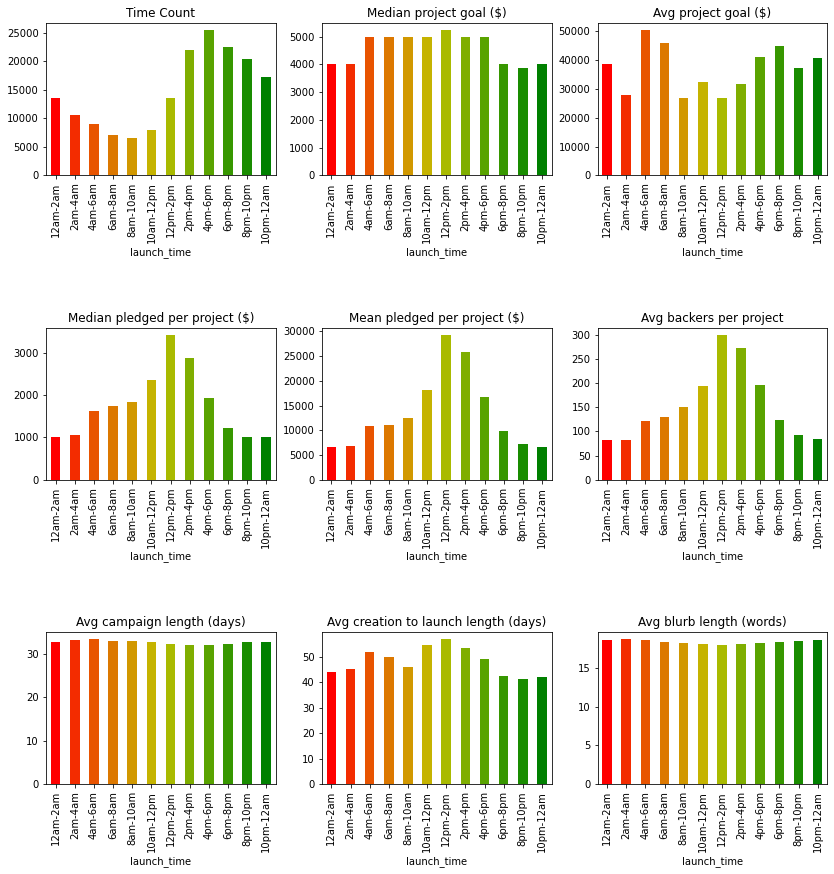

In [50]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(14,14))
red = Color("red")
color = list(red.range_to(Color("green"),12))
color = [color.rgb for color in color]

time_count_sorted.plot(kind='bar', ax=ax1, color=color, rot=90)
ax1.set_title('Time Count')

median_goal_sorted.plot(kind='bar', ax=ax2, color=color, rot=90)
ax2.set_title('Median project goal ($)')

avg_project_sorted.plot(kind='bar', ax=ax3, color=color, rot=90)
ax3.set_title('Avg project goal ($)')

median_pledged_sorted.plot(kind='bar', ax=ax4, color=color, rot=90)
ax4.set_title('Median pledged per project ($)')

mean_pledged_sorted.plot(kind='bar', ax=ax5, color=color, rot=90)
ax5.set_title('Mean pledged per project ($)')

avg_backers_sorted.plot(kind='bar', ax=ax6, color=color, rot=90)
ax6.set_title('Avg backers per project')


avg_campaign_sorted.plot(kind='bar', ax=ax7, color=color, rot=90)
ax7.set_title('Avg campaign length (days)')


avg_creation_to_launch_sorted.plot(kind='bar', ax=ax8, color=color, rot=90)
ax8.set_title('Avg creation to launch length (days)')


avg_blurb_sorted.plot(kind='bar', ax=ax9, color=color, rot=90)
ax9.set_title('Avg blurb length (words)')

fig.subplots_adjust(hspace=1.0)
plt.savefig('visuals/time.png')
plt.show()